In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

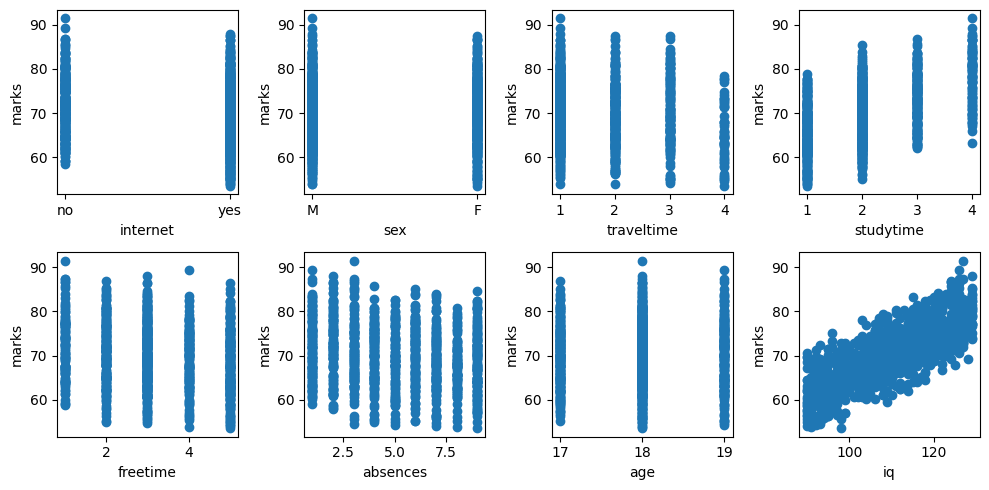

In [151]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

fig=plt.figure(figsize=(10,5))
for i in range(8):
  ax=fig.add_subplot(2,4,i+1)
  ax.scatter(x_train[:,i],y_train)
  ax.set_xlabel(data.columns[i])
  ax.set_ylabel(data.columns[8])
plt.tight_layout()

#studytime and iq has the most significant effect on marks
#internet, traveltime, freetime and absences have smaller effects
#sex and age has least effect (if at all)
#since the dominant features are linearly dependent on 'marks', no additional features are required

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
  # Encoding for 'internet' : 'no' = 0, 'yes' = 1
  # Encoding for 'sex' : 'F' = 0, 'M' = 1
  for i in range(len(x_train)):
    if x_train[i,0]=='no':x_train[i,0]=0
    else:x_train[i,0]=1
    if x_train[i,1]=='F':x_train[i,1]=0
    else:x_train[i,1]=1
  # ---------
  return x_train

x_train = feature_changing(x_train)

In [152]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    x_mean=np.mean(x_train,axis=0)
    x_std=np.std(x_train,axis=0)
    x_train=(x_train-x_mean)/x_std
  # ---------

    return x_train,x_std,x_mean

In [153]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
    y_pred=np.dot(x_train,w)+b
    loss=.5*np.mean((y_pred-y_train)**2)
  # ---------

    return loss

In [154]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
    lr=.001  #learning rate
    y_pred=np.dot(x_train,w)+b
    for i in range(np.size(x_train,1)):
      w[i]-=lr*np.dot(x_train[:,i],y_pred-y_train)/len(x_train)
      b-=lr*np.mean(y_pred-y_train)
  # ---------

    return w,b

In [155]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
